In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [6]:
loan = pd.read_csv(r'D:\DATA_SCIENCE_PROJECTS\loan_approval_prediction\notebooks\cleaned_data.csv')




In [13]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,0.186356,360.0,1.0,1,1
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1


In [12]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


<Axes: xlabel='Gender', ylabel='count'>

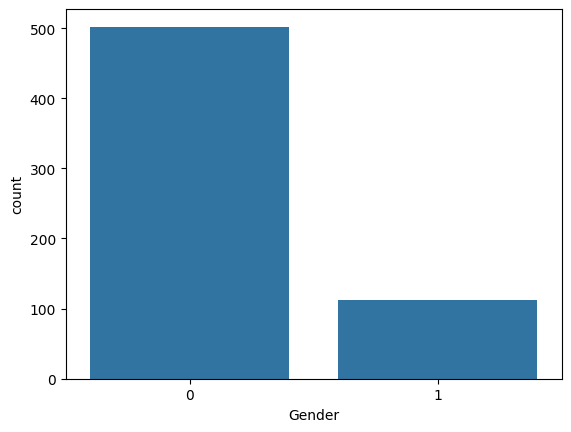

In [14]:
# Data analysis
sns.countplot(x="Gender",data=loan)

Males are high than the females

males are approxiamtely 500

females are 100

<Axes: xlabel='Married', ylabel='Count'>

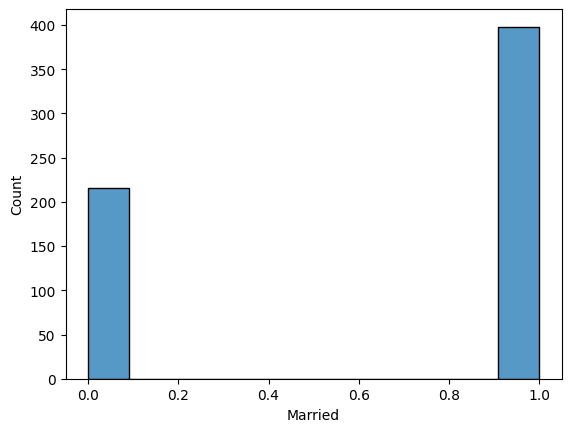

In [16]:
sns.histplot(x="Married",data=loan)

most of the people are married(400 count nearly)

unmarrued are(220 count)

<Axes: xlabel='Dependents', ylabel='count'>

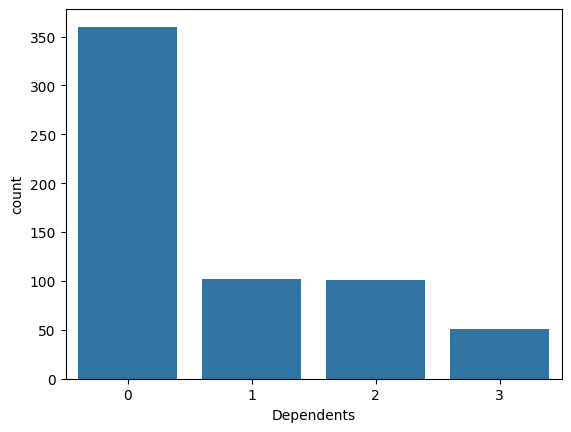

In [17]:
sns.countplot(x="Dependents",data=loan)

<Axes: xlabel='Gender', ylabel='count'>

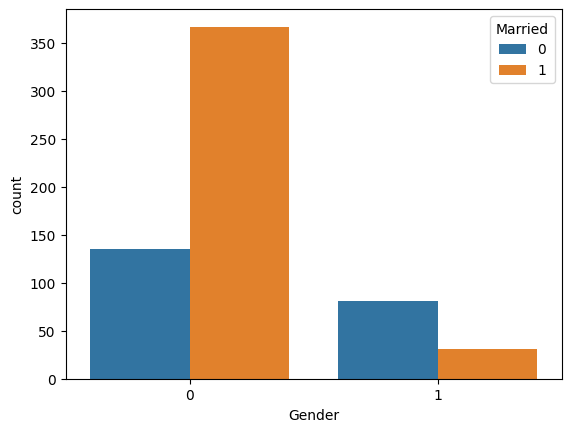

In [23]:
sns.countplot(x="Gender",hue="Married",data=loan)

<Axes: xlabel='Self_Employed', ylabel='count'>

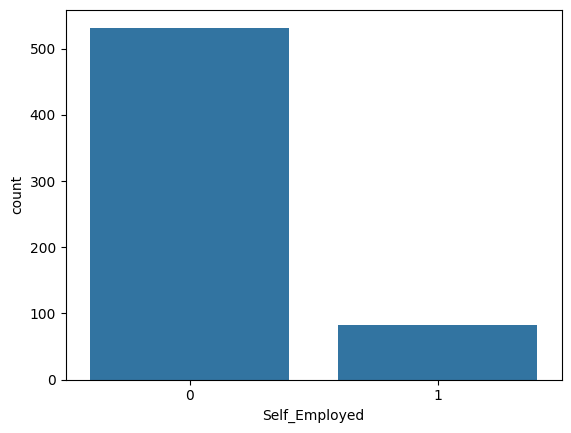

In [24]:
sns.countplot(x="Self_Employed",data=loan)

few people are self employed 

most of the people are unemployed

<Axes: xlabel='Property_Area', ylabel='count'>

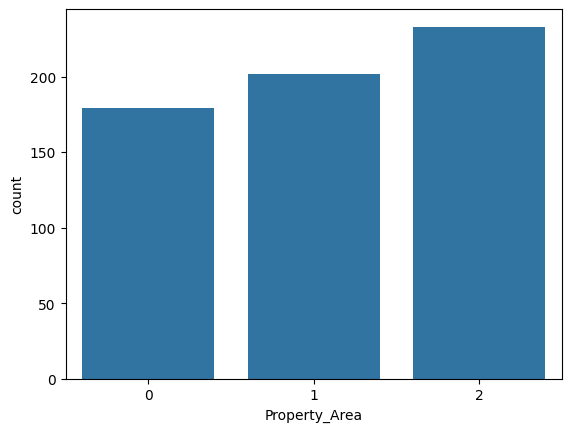

In [25]:

sns.countplot(x="Property_Area",data=loan)

semiurban people are high(250)

urban people less(180) than semiurban

rural people are less(170) than urban



C:\Users\HP\AppData\Local\Temp\ipykernel_9384\1837976312.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan["Credit_History"])


<Axes: xlabel='Credit_History', ylabel='Density'>

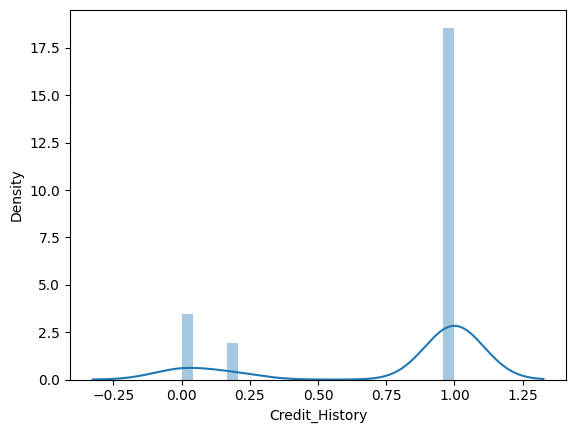

In [26]:
sns.distplot(loan["Credit_History"])

Split the Independent and Dependent features

In [28]:
x=loan.drop(columns="Loan_Status",axis=1)
y=loan["Loan_Status"]
print(x)
print(y)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         0        0           0          1              0             5849   
1         0        1           1          1              0             4583   
2         0        1           0          1              1             3000   
3         0        1           0          0              0             2583   
4         0        0           0          1              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       1        0           0          1              0             2900   
610       0        1           3          1              0             4106   
611       0        1           1          1              0             8072   
612       0        1           2          1              0             7583   
613       1        0           0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [30]:
y.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

Train Test split

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Standardization

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [32]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [33]:
print(x_train_scaled)
print(x_test_scaled)
print(type(x_train_scaled))
print(type(x_test_scaled))

[[-0.48339253  0.76077469 -0.72327513 ...  0.32983528 -1.54679242
   1.10074022]
 [-0.48339253  0.76077469 -0.72327513 ...  0.32983528  0.53414776
   1.10074022]
 [-0.48339253  0.76077469  1.26068067 ...  0.32983528  0.53414776
   1.10074022]
 ...
 [ 2.06871213 -1.31444961 -0.72327513 ...  0.32983528  0.53414776
  -0.12480048]
 [ 2.06871213 -1.31444961 -0.72327513 ... -1.08233071  0.53414776
   1.10074022]
 [-0.48339253  0.76077469 -0.72327513 ...  0.32983528  0.53414776
  -0.12480048]]
[[-0.48339253  0.76077469 -0.72327513 ...  0.32983528  0.53414776
   1.10074022]
 [-0.48339253  0.76077469 -0.72327513 ...  0.32983528 -1.54679242
   1.10074022]
 [-0.48339253  0.76077469  1.26068067 ...  0.32983528  0.53414776
  -1.35034118]
 ...
 [-0.48339253  0.76077469  0.26870277 ...  1.74200128  0.53414776
   1.10074022]
 [-0.48339253  0.76077469  1.26068067 ...  0.32983528  0.53414776
  -0.12480048]
 [-0.48339253  0.76077469 -0.72327513 ... -1.78841371  0.53414776
  -0.12480048]]
<class 'numpy.nd

In [34]:
type(x_train_scaled)

numpy.ndarray

<Axes: >

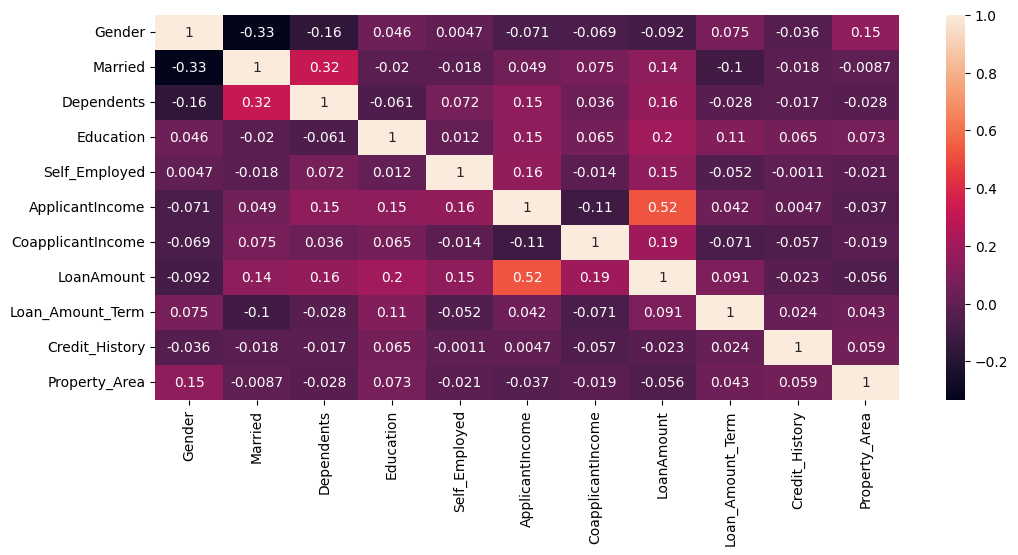

In [39]:
plt.figure(figsize=(12,5))
sns.heatmap(x_train.corr(),annot=True)

In [37]:
def correlation(data,threshold):
    col_corr=set()
    col_matrix=data.corr()
    for i in range(len(col_matrix.columns)):
        for j in range (i):
            if abs(col_matrix.iloc[i,j])>threshold:
                colname=col_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [42]:
correlation(x_train,0.70)

set()

In [45]:
model=LogisticRegression(class_weight='balanced')

In [46]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
model.fit(x_train_scaled,y_train)

# testing score
y_pred=model.predict(x_test_scaled)
score=accuracy_score(y_test,y_pred)
print("testing score",score)

# training score
y_pred_train=model.predict(x_train_scaled)
score_train=accuracy_score(y_train,y_pred_train)
print("training score",score_train)



testing score 0.7317073170731707
training score 0.7433808553971487


HYPERPARAMETER TUNING

In [50]:
from sklearn.model_selection import RandomizedSearchCV
params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg', 'sag'],  # Exclude 'newton-cholesky' (not commonly used for classification)
    'C': [100, 0.1, 10, 0.01]
}


In [51]:
randomised=RandomizedSearchCV(model,params,cv=5)

In [62]:
randomised.fit(x_train_scaled,y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\AppData\Local\Progr

RandomizedSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
                   param_distributions={'C': [100, 0.1, 10, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['liblinear', 'saga', 'lbfgs',
                                                   'newton-cg', 'sag']})

In [63]:
randomised.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.01}

In [64]:
randomised.best_score_

0.7371675943104515

In [66]:
y_pred_random=randomised.predict(x_train_scaled)
score=accuracy_score(y_train,y_pred_random)
print("hyperparamater tuning for training score",score)

# testing score for hyperparameter tuning
y_pred_random_test=randomised.predict(x_test_scaled)
score=accuracy_score(y_test,y_pred_random_test)
print("hyperparamater tuning for testing  score",score)

hyperparamater tuning for training score 0.745417515274949
hyperparamater tuning for testing  score 0.7560975609756098


In [67]:
residuals=y_test-y_pred_random_test
print(residuals)

350    0
377    1
163    0
609    0
132    0
      ..
231    0
312    0
248    0
11     0
333    0
Name: Loan_Status, Length: 123, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_9384\2665350104.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: xlabel='Loan_Status', ylabel='Density'>

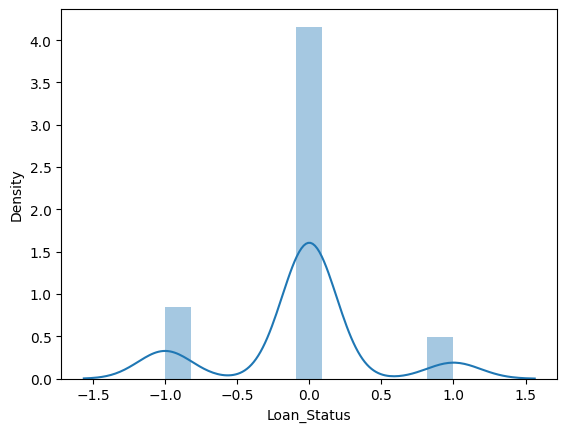

In [68]:
sns.distplot(residuals)

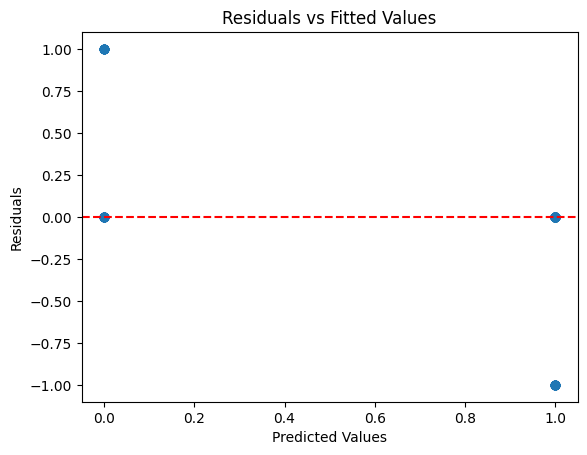

In [69]:
plt.scatter(y_pred_random_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


In [70]:
import pickle

In [71]:
pickle.dump(model,open("model.pkl","wb"))
pickle.dump(scaler,open("scaler.pkl","wb"))